In [1]:
import pandas as pd
import numpy as np

# Non-Linear Modeling
Here, we're going to learn how to use both Decision Trees and Random Forests using a housing data dataset. Within this dataset, we're going to be using a majority of our given columns in order to predict `price`. However, to refresh some of your data preprocessing skills, I'm not going to preprocess any of the dataset for you and instead, I'm going to leave that up to you! 

Once we preprocess our model, we'll then train/predict using both of our non-linear methods and also with linear regression to see which model performs best for this specific dataset

### Preprocessing

In [32]:
# Read in the dataset.
data = pd.read_csv("./data/housing_data.csv")

In [33]:
# Drop the following columns: zipcode, yr_renovated, sqft_basement, condition, and grade
data = data.drop(["zipcode", "yr_renovated", "sqft_basement", "condition", "grade"], axis=1)

In [34]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,1180,1955,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,2170,1951,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,770,1933,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,1050,1965,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,1680,1987,47.6168,-122.045,1800,7503


In [35]:
# Are there any other columns that you should drop?
data = data.drop("id", axis=1)

In [36]:
data.date.head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [37]:
# Preprocess the date column to be the following format: dd.mm.yyyy
# Ex: The date `20141013T000000` corresponds to `13.10.2014`

data["date"] = data["date"].str.replace("T000000", "")

data.date.head()

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

In [38]:
#data.dtypes

In [39]:
# Convert to datetime
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")

In [40]:
#data.dtypes

In [41]:
# Convert to text wi§th the format dd-mm-yyyy
data["date"] = data["date"].dt.strftime("%d.%m.%Y") # string 

In [43]:
# Check if there are any missing values. If so, delete these rows.
data = data.dropna(axis=0)

In [44]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,13.10.2014,221900.0,3,1.00,1180,5650,1.0,0,0,1180,1955,47.5112,-122.257,1340,5650
1,09.12.2014,538000.0,3,2.25,2570,7242,2.0,0,0,2170,1951,47.7210,-122.319,1690,7639
2,25.02.2015,180000.0,2,1.00,770,10000,1.0,0,0,770,1933,47.7379,-122.233,2720,8062
3,09.12.2014,604000.0,4,3.00,1960,5000,1.0,0,0,1050,1965,47.5208,-122.393,1360,5000
4,18.02.2015,510000.0,3,2.00,1680,8080,1.0,0,0,1680,1987,47.6168,-122.045,1800,7503


### Modeling

In [45]:
from sklearn.model_selection import train_test_split

# Do not use date, lat or long within your training variables.
X = data.drop(["date", "lat", "long", "price"], axis=1)

# Using price as the target variable
y = data["price"]

# Split your dataset into a 80/20 training/testing split with a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Using a linear regression model, come up with predictions on the testing set.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [47]:
# Using a decision tree, come up with predictions on the testing set.
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [50]:
#RandomForestRegressor?

In [48]:
# Using a random forest, come up with predictions on the testing set.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [51]:
# Along with the actuals, put the LR, DT, and RF model predictions in a single dataframe.
preds_df = pd.DataFrame()
preds_df["actual"] = y_test
preds_df["lr_pred"] = lr_preds
preds_df["dt_pred"] = dt_preds
preds_df["rf_pred"] = rf_preds

In [52]:
# Using R^2 as a metric, which algorithm performed the best?

from sklearn.metrics import r2_score

lr_r2 = r2_score(preds_df["actual"], preds_df["lr_pred"])
dt_r2 = r2_score(preds_df["actual"], preds_df["dt_pred"])
rf_r2 = r2_score(preds_df["actual"], preds_df["rf_pred"])

print(f"Linear Regression: {lr_r2}")
print(f"Decision Tree: {dt_r2}")
print(f"Random Forest: {rf_r2}")

Linear Regression: 0.6077368086073192
Decision Tree: 0.44583001303132297
Random Forest: 0.6759884034688577


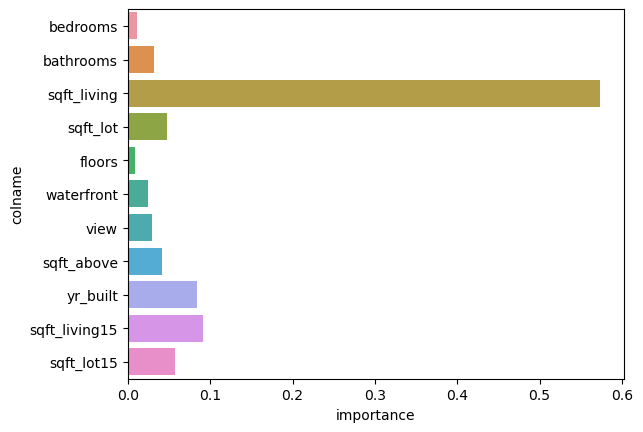

In [54]:
# For the Random Forest model, use seaborn to print display the feature importance.
# Which is by far the most important feature?
feat_importances = pd.DataFrame()
feat_importances["colname"] = X_train.columns
feat_importances["importance"] = rf.feature_importances_

import seaborn as sns

sns.barplot(
    data = feat_importances,
    y = "colname",
    x = "importance",
    orient = "h"
);

### Challenges

In [57]:
#from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier?

In [61]:
#RandomForestRegressor?
#LinearRegression?

In [62]:
from tqdm.notebook import tqdm

In [63]:
# Challenge: By trying different hyperparameters, can you improve upon the R^2 performance for this training/testing split?

# 2 Parameters
n_estimators = list(range(1, 101, 50))
criterions = ["squared_error", "poisson"]

# Initialize the dataframe.
tuning_df = pd.DataFrame()
counter = 0

for n_estimator in n_estimators:
    for criterion in criterions:
        print(n_estimator, criterion)
        rf = RandomForestRegressor(
            n_estimators=n_estimator,
            criterion=criterion,
        )
        rf.fit(X_train, y_train)
        rf_preds = rf.predict(X_test)
        r2 = r2_score(y_test, rf_preds)
        tuning_df.loc[counter, "n_estimator"] = n_estimator
        tuning_df.loc[counter, "criterion"] = criterion
        tuning_df.loc[counter, "r2"] = r2

        counter += 1    

1 squared_error
1 poisson
51 squared_error
51 poisson


In [65]:
n_estimators

[1, 51]

In [64]:
tuning_df

,n_estimator,criterion,r2
0,1.0,squared_error,0.441352
1,1.0,poisson,0.387929
2,51.0,squared_error,0.672402
3,51.0,poisson,0.664994


In [66]:
# EXTRA - HYPERPARAMETER TUNNING USING GridSEARCH
# https://scikit-learn.org/stable/modules/grid_search.html

# Build ONE model without hyperparameter tunning
model = RandomForestRegressor() 
model.fit(X_train, y_train) 
  
# predict the mode 
y_pred = model.predict(X_test) 
  

train_pred_y = model.predict(X_train)
test_pred_y = model.predict(X_test)

print(f"train_r2 = {r2_score(y_train, train_pred_y)}")
print(f"test_r2 = {r2_score(y_test, test_pred_y)}")

train_r2 = 0.960519660080251
test_r2 = 0.6753285660708892


In [67]:
from sklearn.model_selection import GridSearchCV #, RandomizedSearchCV 
param_grid = {
    #"n_estimators":[100,200,300],
    #"max_depth":[10, 50, 100],
    #"max_features":[6,8,10,12,14,16]
    "n_estimators":[10, 20, 100],
    "max_depth":[10, 50],
    "max_features":[6,8,10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid
)

grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=50, max_features=6)


In [ ]:
# Challenge: Using a decision tree with a max_leaf_nodes of 3, plot the decision tree. Do you know how to interpret this?
from sklearn import tree

dt = DecisionTreeRegressor(max_leaf_nodes=3)
dt.fit(X_train, y_train)
tree.plot_tree(dt)

In [68]:
# Challenge: The R^2 scores we found only correspond to this particular training and testing split.
# What is an appropriate way to obtain more general results for each of the 3 algorithms? 
# Once you think of the answer, do this for each of the algorithms and come up with the average answer.
# Now, does your current result match up with what we previously came up with?

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


num_folds = 5
random_seed = 42

kfold = KFold(
    n_splits=num_folds,
    random_state=random_seed,
    shuffle=True
)
print('Working on LR...')
lr = LinearRegression()
# Generalizing well, if you were not "lucky/unlucky" on your test data
lr_cv_results = cross_val_score(
    lr, X, y, 
    cv=kfold,
    scoring="r2"
)
print('Working on DT...')
dt = DecisionTreeRegressor()
dt_cv_results = cross_val_score(
    dt, X, y, 
    cv=kfold,
    scoring="r2"
)

print('Working on RF...')
rf = RandomForestRegressor()
rf_cv_results = cross_val_score(
    rf, X, y, 
    cv=kfold,
    scoring="r2"
)

Working on LR...
Working on DT...
Working on RF...


In [74]:
print(f"LR 5-fold CV Results: {np.mean(lr_cv_results), np.std(lr_cv_results)}")
print(f"DT 5-fold CV Results: {np.mean(dt_cv_results), np.std(lr_cv_results)}")
print(f"RF 5-fold CV Results: {np.mean(rf_cv_results), np.std(lr_cv_results)}")

LR 5-fold CV Results: (0.6056743936648576, 0.004862174830063005)
DT 5-fold CV Results: (0.45502704049831894, 0.004862174830063005)
RF 5-fold CV Results: (0.7153185938685314, 0.004862174830063005)


# Let's do some math to "prove" that ensembles work!


Let's say that we have 5 different models with the following probabilities of being correct in a binary classification sense:
- Model 1: 0.63
- Model 2: 0.61
- Model 3: 0.65


If we were to use majority voting (i.e. if at least 2 of 3 predict one class, the final ensemble prediction will be that class), what's the probability that we get our prediction correct?

Hint: Calculate the probability of 0 being correct, the probability of 1 being correct, the probability of 2 being correct, and the probability of getting all correct. 

In [75]:
# Probability of 0 correct:
p0 = (1 - 0.63) * (1 - 0.61) * (1 - 0.65)

# Probability of 1 correct:
p1 = ((0.63) * (1 - 0.61) * (1 - 0.65)) + \
    ((1 - 0.63) * (0.61) * (1 - 0.65)) + \
    ((1 - 0.63) * (1 - 0.61) * (0.65))

# Probability of 2+ correct:
p2_and_p3 = 1 - p0 - p1

# Probability of our final prediction being correct:
print(f"Probability of our final prediction being correct: {p2_and_p3}")

Probability of our final prediction being correct: 0.6907099999999999
